## DBSCAN
- Relies on a density-based notion of cluster 
- Discovers clusters of arbitrary shape in spatial databases with noise 
### Basic Idea:
- Group together points in high-density 
- Mark as outliers points that lie alone in low-density regions 
Local point density at a point p is defined by two parameters: 
- ε radius for the neighborhood of point p: 
  - ε-Neighborhood: all points within a radius of ε from the point p 
  - Nε(p) := {q in data set D | dist(p, q) ≤ ε} 
- MinPts:minimum number of points in the given neighborhood N(p) 


In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import itertools

import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns

import scipy.stats as stats
#from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN

In [2]:
acc = pd.read_csv('../data/cleaned/coll_coord.csv', low_memory=False)

In [3]:
# acc['latitude'][0]

In [4]:
# acc.info()

In [5]:
acc=acc.drop([202130],axis=0)

In [6]:
acc[['longitude','latitude']].isnull().sum()

longitude    0
latitude     0
dtype: int64

In [7]:
X = np.array(acc[['longitude','latitude']])

In [65]:
sel_size=20000
x=X[:sel_size]

In [109]:
clustering = DBSCAN(eps=0.001, min_samples=5).fit(x)

In [110]:
# clustering.fit(x)

In [111]:
l=clustering.labels_
len(np.unique(l))

636

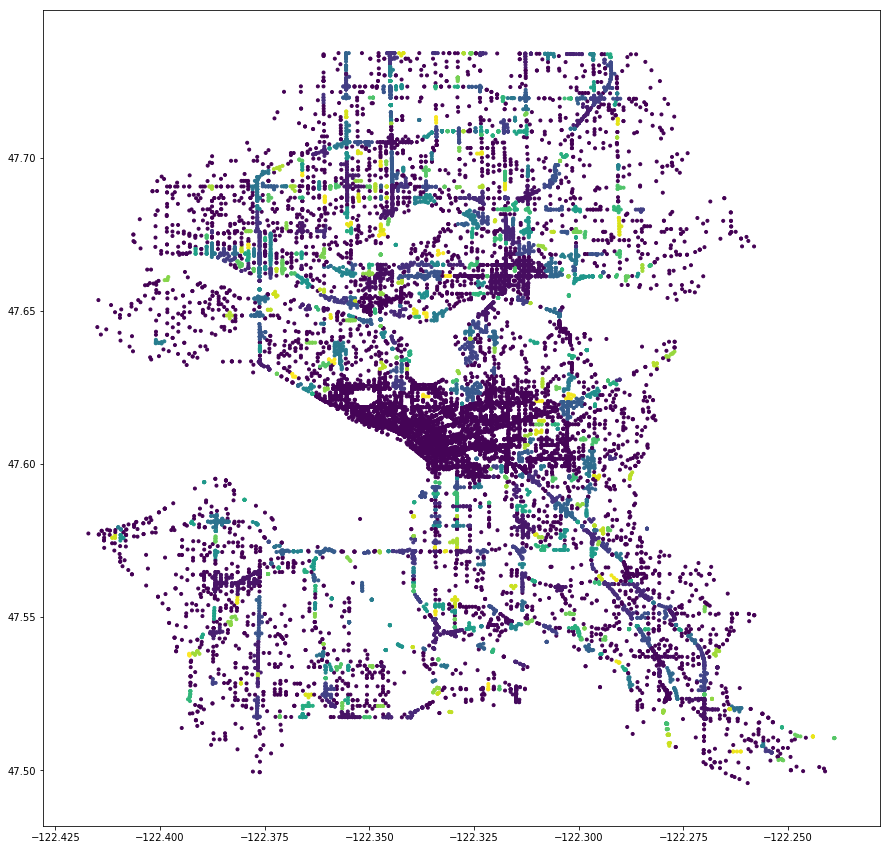

In [112]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x[:,0],x[:,1],c=l,marker='.')

In [21]:
# X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])
# clustering_2 = DBSCAN(eps=3, min_samples=2).fit(X)
# clustering_2.labels_

array([ 0,  0,  0,  1,  1, -1])

In [22]:
# clustering_2 

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)